In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
df=pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
df=df.drop(columns=['id','diagnosis','Unnamed: 32','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_worst','texture_worst','perimeter_worst','compactness_mean','concavity_mean','radius_se','texture_se','perimeter_se','concave points_se','symmetry_se','compactness_se','concavity_se','fractal_dimension_se'])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,area_se,smoothness_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,153.40,0.006399,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,74.08,0.005225,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,94.03,0.006150,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,27.23,0.009110,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,94.44,0.011490,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
area_se                    0
smoothness_se              0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [63]:
model=MinMaxScaler()
df=model.fit_transform(df)
df

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [64]:
df.shape

(569, 14)

In [65]:
df=pd.DataFrame(df,columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N'])
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.273811,0.159296,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.125660,0.119387,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.162922,0.150831,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.038155,0.251453,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.163688,0.332359,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [66]:
model=KMeans(n_clusters=2)
model.fit(df)

D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2)

In [67]:
pred=model.predict(df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [68]:
df['Clusters']=pred
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Clusters
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.273811,0.159296,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.125660,0.119387,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.162922,0.150831,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.038155,0.251453,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.163688,0.332359,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1


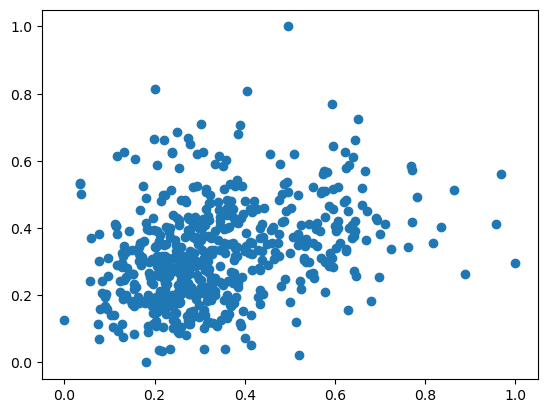

In [71]:
plt.scatter(df['A'],df['B'])

<Axes: xlabel='F', ylabel='A'>

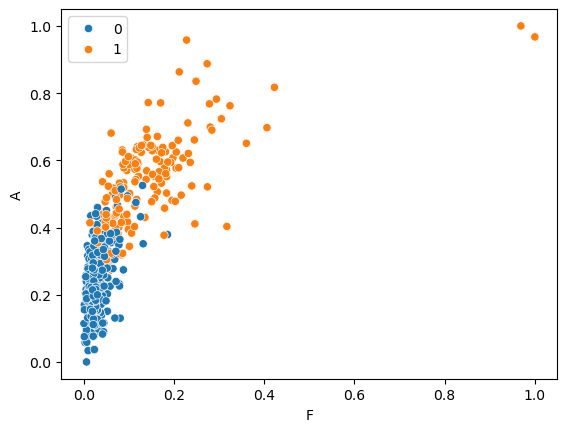

In [84]:
import seaborn as sns
sns.scatterplot(df,x='F',y='A',hue=model.labels_)

In [ ]:
df['F'int(F)

In [87]:
K_RNG=range(1,11)
Sse=[]
for k in K_RNG:
    model=KMeans(n_clusters=k)
    model.fit([['F','A']])
    Sse.append(model.inertia_)
    
Sse



ValueError: could not convert string to float: 'F'